In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
from utils.pluto_utils import PlutoData
from utils.visualise import *

In [4]:
import yt
import soxs
import pyxsim

soxs : [WARNING  ] 2025-05-15 22:14:13,774 Setting 'soxs_data_dir' to /home/yangelaxue/.cache/soxs for this session. Please update your configuration if you want it somewhere else.


# Units

In [5]:
CONST_kB = 1.380649e-16 # ergs/K
CONST_thompson = 6.6524587158e-25 # cm^2
CONST_me = 9.10938356e-28 # gr
CONST_erg_to_eV = 6.242e+11
CONST_c = 3e10 # cm/s

# Load Data

In [18]:
output_dir = "/home/yangelaxue/Documents/VUW/pluto_runs/HD/Blast/"
save_dir = os.path.join(output_dir,'visualisation/')

if not os.path.exists(save_dir):
    os.mkdir(save_dir)

In [19]:
data = PlutoData(output_dir)
data.__dict__

{'output_dir': '/home/yangelaxue/Documents/VUW/pluto_runs/HD/Blast/',
 'ndim': 3,
 'Units': <utils.pluto_utils.PlutoUnits at 0x70443f3c8f20>}

In [22]:
units = 'code'
timeslices = 'all'

In [21]:
if data.ndim==2:
    X, Y = data.load_domain_from_HDF5(units=units)
elif data.ndim==3:
    X, Y, Z = data.load_domain_from_HDF5(units=units)
times = data.load_times(units=units)

In [23]:
rho = data.load_data_from_HDF5('rho',units=units,timeslices=timeslices)

In [24]:
vx1 = data.load_data_from_HDF5('vx1',units=units,timeslices=timeslices)
vx2 = data.load_data_from_HDF5('vx2',units=units,timeslices=timeslices)

if data.ndim==2:
    v = [(_vx1**2 + _vx2**2)**.5 for _vx1,_vx2 in zip(vx1,vx2)]
elif data.ndim>2:
    vx3 = data.load_data_from_HDF5('vx3',units=units,timeslices=timeslices)
    v = [(_vx1**2 + _vx2**2 + _vx3**2)**.5 for _vx1,_vx2,_vx3 in zip(vx1,vx2,vx3)]

In [25]:
try:
    prs = data.load_data_from_HDF5('prs',units=units,timeslices=timeslices)
    prs_bool = True
except:
    prs_bool = False
    print("Pressure is not part of the simulation.")

In [26]:
try:
    Bx1 = data.load_data_from_HDF5('Bx1',units=units,timeslices=timeslices)
    Bx2 = data.load_data_from_HDF5('Bx2',units=units,timeslices=timeslices)
    
    if data.ndim==2:
        B = [(_Bx1**2 + _Bx2**2)**.5 for _Bx1,_Bx2 in zip(Bx1,Bx2)]
    elif data.ndim>2:
        Bx3 = data.load_data_from_HDF5('Bx3',units=units,timeslices=timeslices)
        B = [(_Bx1**2 + _Bx2**2 + _Bx3**2)**.5 for _Bx1,_Bx2,_Bx3 in zip(Bx1,Bx2,Bx3)]
    B_bool = True
except:
    B_bool = False
    print("Magnetism is not part of the simulation.")

Magnetism is not part of the simulation.


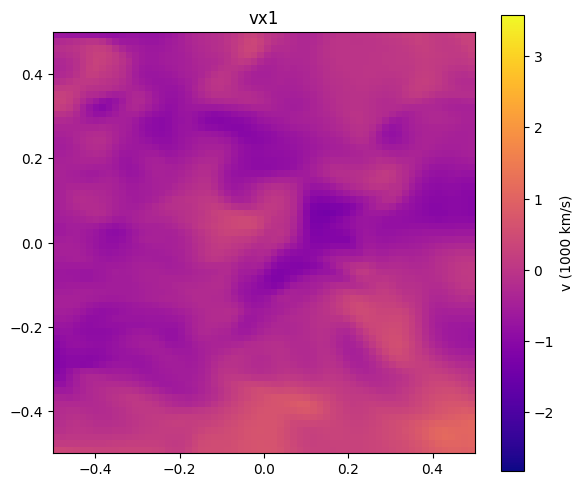

In [10]:
_var_list = get_list2D(vx1, 32)
_var_list = np.array(_var_list) * CONST_v0 * 1e-8 # velocity from cm/s to 1000 km/s
var_name = 'vx1'

vmin, vmax = np.min(_var_list), np.max(_var_list)

animate_vars(_var_list,save_dir=os.path.join(save_dir,f'{var_name}.mp4'),title=f'{var_name}',
             XY=(_X,_Y),
            vmin=vmin,vmax=vmax,
            # cmap='seismic',
            cbar_label='v (1000 km/s)'
)

In [11]:
T = np.array([_prs*CONST_me/_rho/CONST_kB for _prs,_rho in zip(prs,rho)])

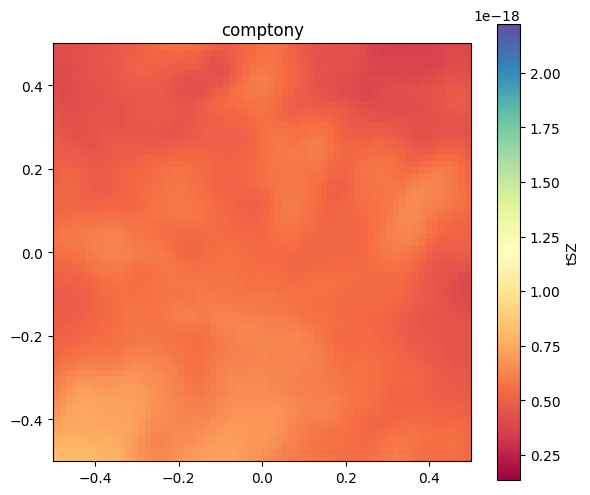

In [31]:
_var_list = get_list2D(out, 32)
_var_list = np.array(_var_list) # Temperature in ergs
var_name = 'comptony'

vmin, vmax = np.min(_var_list), np.max(_var_list)

animate_vars(_var_list,save_dir=os.path.join(save_dir,f'{var_name}.mp4'),title=f'{var_name}',
             XY=(_X,_Y),
            vmin=vmin,vmax=vmax,
            cmap='Spectral',
            cbar_label='tSZ'
)

In [20]:
_prs = prs[50]

In [21]:
from scipy.integrate import simpson

In [29]:
out = CONST_thompson/(CONST_me*CONST_c**2) * np.array([simpson(_prs, dx=1/64, axis=2) for _prs in prs])

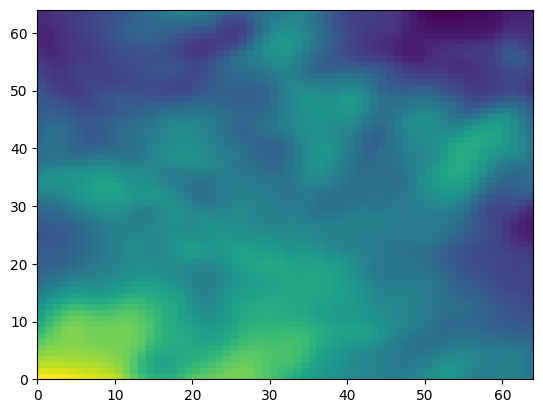

In [30]:
plt.pcolormesh(out[100])